In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train= pd.read_csv("/content/train.csv")
test= pd.read_csv("/content/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
a= train.groupby("Sex")["Survived"].count()

a

,Survived
Sex,
female,314
male,577


<Axes: xlabel='Sex', ylabel='count'>

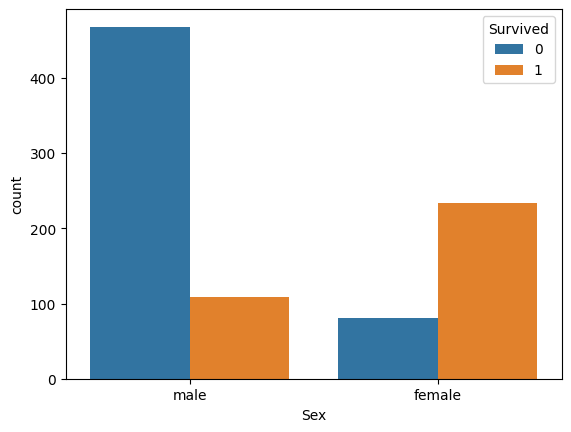

In [9]:
sns.countplot(x="Sex",hue="Survived",data=train)

In [10]:
train["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [11]:
train[train["Survived"]==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
train.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(train.drop(columns=["Survived"],axis=1),train["Survived"],test_size=0.2,random_state=42)


X_train.head()

#Y_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [35]:
train.groupby("Pclass")["Fare"].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [14]:
"#Apply imputations

#Imputation transformer

from sklearn.compose import ColumnTransformer


from sklearn.impute import SimpleImputer

trf1= ColumnTransformer([("imputer_age",SimpleImputer(strategy="mean"),[2]),("imputer_embarked",SimpleImputer(strategy="most_frequent"),[6])],remainder="passthrough")





In [15]:
#One Hot encoding transformer

from sklearn.preprocessing import OneHotEncoder

trf2= ColumnTransformer([("ohe_sex_embarked",OneHotEncoder(sparse_output=False,drop="first",handle_unknown="ignore"),[1,6])],remainder="passthrough")

"""

After one hot encoding, you will have additional columns. The sex columns will be replaced and split into two, Male and Female.

However, due to drop first, one will be dropped so we still have the one column.

However, for embarked, that column will be replaced and split into 3 columns since there are three categories for it. From that one will be dropped, so we will have 2 columns.

Now in total we have 8 columns. This is very important to note before heading onto the next transformers.

"""



'\n\nAfter one hot encoding, you will have additional columns. The sex columns will be replaced and split into two, Male and Female.\n\nHowever, due to drop first, one will be dropped so we still have the one column.\n\nHowever, for embarked, that column will be replaced and split into 3 columns since there are three categories for it. From that one will be dropped, so we will have 2 columns.\n\nNow in total we have 8 columns. This is very important to note before heading onto the next transformers.\n\n'

In [16]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

"""

We are applying MinMaxScalar because we have to perform feature selection after this transformer.

Feature selection involves selecting the best 5 features to be inputted to the model instead of passing everything.

For that, its necessary to encode using MinMaxScalar. If no feature selection was being done, StandardScalar would have worked perfectly fine.

"""
trf3= ColumnTransformer([("scaling_columns",MinMaxScaler(),slice(0,8))])






In [17]:
#Feature selection using Kbest and chi square

#from sklearn.feature_selection import SelectKBest, chi2

#obj1_feature_selection= SelectKBest(score_func=chi2,k=6) #No column transformer required. k=5 means best 5 columns to be chosen

In [18]:
from sklearn.tree import DecisionTreeClassifier

obj2_tree= DecisionTreeClassifier()

#del(tr5)
#del(trf5)
#del(trf4)

In [19]:
# Creating Pipeline to link together the 3 transformers and the scaling and model objects

from sklearn.pipeline import Pipeline

pipe= Pipeline([("trf1",trf1),
                 ("trf2",trf2),
                 ("trf3",trf3),
                 #("obj1",obj1_feature_selection),
                 ("obj2",obj2_tree)])  #Pass a list of tuples of the transformers defined above with their names

# You could have done it with make pipeline also. That is a much easier syntax

"""

from sklearn.pipeline import make_pipeline

pipe= make_pipeline([trf1,trf2,trf3,trf4,trf5]) No need to pass names, just pass object names

Same logic applies to Column_Transformer and make_column_transformer. No need to pass transformer name in it.

"""


'\n\nfrom sklearn.pipeline import make_pipeline\n\npipe= make_pipeline([trf1,trf2,trf3,trf4,trf5]) No need to pass names, just pass object names\n\nSame logic applies to Column_Transformer and make_column_transformer. No need to pass transformer name in it.\n\n'

In [20]:
# Fit_transform

pipe.fit(X_train,Y_train)

"""

Why are we not calling fit_transform?

Because we already have a ML algorithm at the end of our pipeline which is the DecisionTree.

It just needs the fit function to learn parameters. The model ensures the transformations.

"""



'\n\nWhy are we not calling fit_transform?\n\nBecause we already have a ML algorithm at the end of our pipeline which is the DecisionTree.\n\nIt just needs the fit function to learn parameters. The model ensures the transformations.\n\n'

In [38]:
print("Training categories:", set(X_train["Sex"]))
print("Test categories:", set(X_test["Sex"]))


Training categories: {'female', 'male'}
Test categories: {'female', 'male'}


In [39]:
X_train['Sex'].dtypes  # Could be object or category
X_test['Sex'].dtypes     # Could be float or object


dtype('O')

In [40]:
print(X_train['Sex'].unique())
print(X_test['Sex'].unique())


['male' 'female']
['male' 'female']


In [21]:
# Display pipeline schematic

from sklearn import set_config

set_config(display="diagram")

pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer_age',
                                                  SimpleImputer(), [2]),
                                                 ('imputer_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scaling_columns',
                                                  MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('obj2', DecisionTreeClassifier())])

In [22]:
dir(pipe)

pipe.named_steps #Steps being shown of the pipeline. That is why we used Pipeline instead of make_pipeline as it is clearly showing us the names of each transforer/object. Easier to debug.

#Suppose we want to see how the simple imputer in transformer 1 works. We want to see what the mean value is that it imputed in the age column.

pipe.named_steps["trf1"].transformers_[0][1].statistics_




array([29.49884615])

In [23]:
dir(pipe)



['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_can_fit_transform',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_method_params',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_for_step',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params',
 '_ge

In [24]:
# An easy way to get the mean value

pipe.named_steps["trf1"]["imputer_age"].statistics_

array([29.49884615])

In [25]:
#Prediction

y_prediction= pipe.predict(X_test)

y_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0])

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_prediction) #Less accuracy then the previous model

#Lets check and see if removing feature selection has any difference

#Yes, the accuracy increases from 58% to 62% if we exclude feature selection step

0.6256983240223464

In [27]:
# Cross Validation with pipeline

from sklearn.model_selection import cross_val_score

cross_val= cross_val_score(pipe,X_train,Y_train,cv=5,scoring="accuracy").mean()

cross_val

"""
Interpretation of cross_val_score:

The cross_val score of = 0.63 means that the pipeline achieves an average accuracy of 92% on the training data across the 5 cross-validation folds.
This provides an estimate of how well the pipeline is likely to generalize to new data.

"""



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categ

'\nInterpretation of cross_val_score:\n\nThe cross_val score of = 0.63 means that the pipeline achieves an average accuracy of 92% on the training data across the 5 cross-validation folds.\nThis provides an estimate of how well the pipeline is likely to generalize to new data.\n\n'

In [28]:
#gridsearchcv

"""

What is gris search cv?

Grid Search Cross-Validation (GridSearchCV) is a powerful technique in machine learning for systematically
finding the best hyperparameters for a model. It automates the process of tuning hyperparameters by evaluating
all possible combinations of a given set of hyperparameter values and selecting the one that optimizes a
specified performance metric.

"""

params= {
    "obj2__max_depth": [1,2,3,4,5,None]
} #max depth is the paramter being varied of the decision tree classifier. Max depth will be varied
#according to the numbers given in the list and the best combination will be spit out.





In [29]:
from sklearn.model_selection import GridSearchCV

grid_search= GridSearchCV(pipe,params,scoring="accuracy",cv=5)

grid_search.fit(X_train,Y_train)

grid_search

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categ

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('imputer_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scaling_columns',
                                                                         MinMaxScaler(),
                                                                         slice(0, 8, None))])),
                                       ('obj2', DecisionTreeClassifier())]),
             param_grid={'obj2__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [30]:
grid_search.best_score_

0.6391214419383433

In [31]:
grid_search.best_params_ #max depth of 2 is best parameter

{'obj2__max_depth': 2}

In [32]:
"""
When to use cross_val_score and grid search cv?

Cross-validation (cross_val_score) and hyperparameter tuning (GridSearchCV) can be applied to most machine learning
models, but their usage is particularly beneficial for models where hyperparameter tuning significantly affects
performance or where the dataset requires robust generalization evaluation.

Here's a breakdown of where and why to apply these techniques:

1. Cross-Validation (cross_val_score)
Applicability:
Cross-validation is generally applicable to all machine learning models that have a fit() method,
including both supervised and unsupervised models. It's used to evaluate model performance by splitting the data
into multiple folds and assessing generalization.

Models:

Supervised Learning:
Linear Models: Linear Regression, Logistic Regression.
Tree-Based Models: Decision Trees, Random Forests, Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost).
Support Vector Machines (SVM).
K-Nearest Neighbors (KNN).
Naive Bayes.
Neural Networks (e.g., Multi-Layer Perceptrons in sklearn).

Unsupervised Learning:

Clustering: K-Means, DBSCAN, Agglomerative Clustering.
Dimensionality Reduction: PCA (to evaluate reconstruction error or explained variance).

Why Use Cross-Validation:

To reduce overfitting risk by evaluating the model's performance on unseen data.
To get a reliable estimate of the model’s performance on the dataset.
To compare the performance of different models or preprocessing techniques.

When to Avoid:

For time series data, standard k-fold cross-validation isn’t suitable because it doesn’t respect the temporal order.
Use specialized techniques like TimeSeriesSplit instead.

2. Grid Search (GridSearchCV)

Applicability:
GridSearchCV is applied to models with tunable hyperparameters, where finding the right combination of hyperparameters
significantly impacts performance. It’s primarily used in supervised learning but can be extended to certain
unsupervised methods.

Models:
Linear Models:

Ridge Regression and Lasso Regression: Tuning the regularization parameter (
𝛼
α).
Logistic Regression: Tuning regularization (C) and penalty type (l1, l2).
Tree-Based Models:

Decision Trees: Tuning depth (max_depth), minimum samples per split (min_samples_split), etc.
Random Forests: Tuning number of trees (n_estimators), depth, and features considered for splits (max_features).
Gradient Boosting Models: XGBoost, LightGBM, CatBoost.
Tuning learning rate, depth, number of estimators, etc.
Support Vector Machines (SVM):

Tuning regularization parameter (C), kernel type, and kernel-specific parameters (e.g., gamma for RBF kernel).
K-Nearest Neighbors (KNN):

Tuning the number of neighbors (n_neighbors), distance metric, and weight function.
Neural Networks (Sklearn's MLPClassifier/MLPRegressor):

Tuning the number of hidden layers, activation function, learning rate, and regularization.

Unsupervised Models (Fewer use cases):

K-Means: Tuning the number of clusters (n_clusters).
PCA: Deciding the number of components (n_components).

Why Use GridSearchCV:

To fine-tune hyperparameters that directly influence the model’s performance.
To find the optimal trade-off between bias and variance by selecting the best combination of hyperparameters.
When to Avoid:
When the parameter grid is very large (computationally expensive). Use RandomizedSearchCV instead.
If the model does not have meaningful hyperparameters to tune (e.g., Naive Bayes, some linear models without
regularization)

"""



"\nWhen to use cross_val_score and grid search cv?\n\nCross-validation (cross_val_score) and hyperparameter tuning (GridSearchCV) can be applied to most machine learning\nmodels, but their usage is particularly beneficial for models where hyperparameter tuning significantly affects\nperformance or where the dataset requires robust generalization evaluation.\n\nHere's a breakdown of where and why to apply these techniques:\n\n1. Cross-Validation (cross_val_score)\nApplicability:\nCross-validation is generally applicable to all machine learning models that have a fit() method,\nincluding both supervised and unsupervised models. It's used to evaluate model performance by splitting the data\ninto multiple folds and assessing generalization.\n\nModels:\n\nSupervised Learning:\nLinear Models: Linear Regression, Logistic Regression.\nTree-Based Models: Decision Trees, Random Forests, Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost).\nSupport Vector Machines (SVM).\nK-Nearest Neighbors (K

In [33]:
#export pipeline

import pickle

with open ("pipe.pkl","wb") as file:
  pickle.dump(pipe,file)
